In [9]:
# import things

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

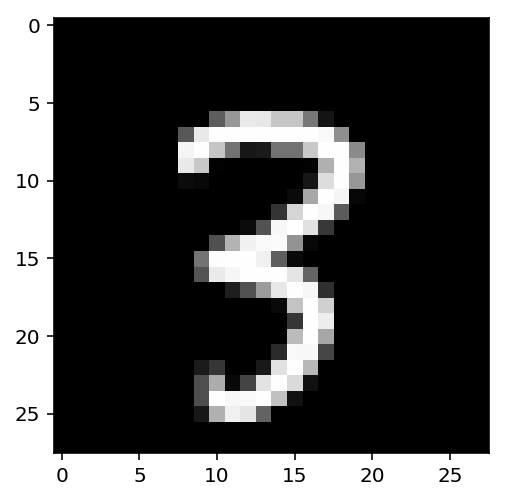

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

### Define The Networks

In [5]:
from torch import nn
import torch.nn.functional as F

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.fc1 = nn.Linear(in_features=784, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [7]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0323,  0.0191, -0.0175,  ..., -0.0069, -0.0146,  0.0273],
        [-0.0093, -0.0043, -0.0249,  ..., -0.0102, -0.0034,  0.0241],
        [-0.0271, -0.0188,  0.0315,  ...,  0.0079, -0.0071,  0.0039],
        ...,
        [-0.0165, -0.0278, -0.0068,  ...,  0.0166,  0.0156,  0.0288],
        [ 0.0269, -0.0247,  0.0278,  ...,  0.0257, -0.0178, -0.0310],
        [ 0.0073,  0.0178,  0.0178,  ..., -0.0305, -0.0203, -0.0153]],
       requires_grad=True)
Parameter containing:
tensor([-0.0146, -0.0009,  0.0252, -0.0261, -0.0204,  0.0023,  0.0129,  0.0230,
        -0.0053, -0.0193, -0.0189, -0.0299, -0.0249,  0.0264, -0.0350,  0.0263,
         0.0317, -0.0095,  0.0028,  0.0194,  0.0225, -0.0293, -0.0070, -0.0347,
        -0.0163, -0.0154, -0.0094,  0.0042, -0.0027, -0.0273, -0.0332,  0.0108,
         0.0079,  0.0180,  0.0131, -0.0057, -0.0342,  0.0008,  0.0195,  0.0232,
         0.0040, -0.0313, -0.0241, -0.0335,  0.0096,  0.0314,  0.0019,  0.0324,
        -0.0259

In [8]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [10]:
model.fc1.weight.data.normal_(std=0.1)

tensor([[ 0.0500, -0.0085, -0.1017,  ...,  0.1982,  0.0943,  0.0222],
        [-0.0077, -0.0241, -0.0262,  ...,  0.0982,  0.1216,  0.0396],
        [-0.0423,  0.0338, -0.1132,  ..., -0.0971, -0.1468, -0.0182],
        ...,
        [-0.0213,  0.0562,  0.0666,  ..., -0.1109, -0.0028, -0.0440],
        [-0.0612,  0.2829, -0.0691,  ..., -0.0196,  0.0863,  0.0046],
        [ 0.0520,  0.0043, -0.0357,  ..., -0.0055,  0.0719, -0.0507]])

### Forward Pass

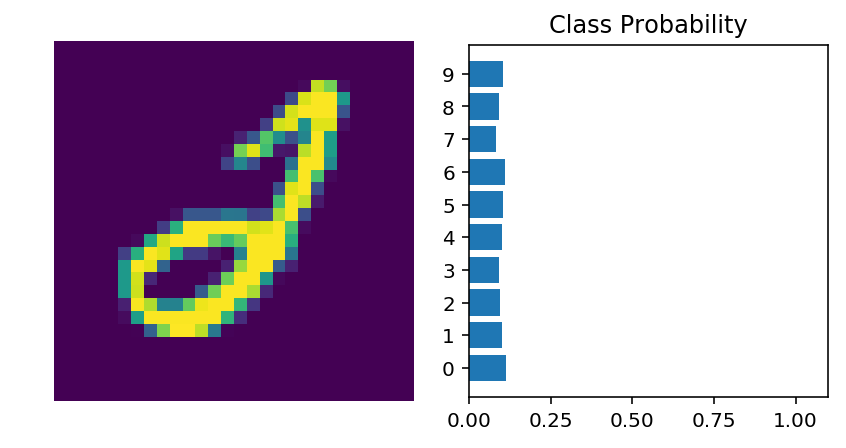

In [19]:
images, labels = next(iter(trainloader))

images.resize_(64, 1, 784)
images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0])

helper.view_classify(images[0].view(1, 28, 28), ps)

## Using `Sequential` for building Networks

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


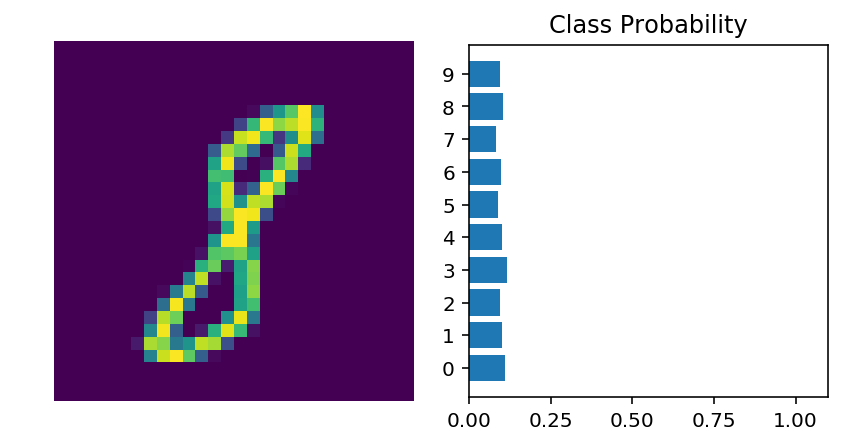

In [20]:
# hyperparameters
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[0], hidden_size[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[1], output_size),
                     nn.Softmax(dim=1))
print(model)

# forward pass
images, labels = next(iter(trainloader))
images.resize_(64, 1, 784)
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [23]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_size[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))
model.fc2

Linear(in_features=128, out_features=64, bias=True)

In [24]:
input_dim = 784
hidden_dim = [400, 200, 100]
output_dim = 10

layers = OrderedDict([
    ('fc1', nn.Linear(in_features=input_dim, out_features=hidden_dim[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(in_features=hidden_dim[0], out_features=hidden_dim[1])),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(in_features=hidden_dim[1], out_features=hidden_dim[2])),
    ('relu3', nn.ReLU()),
    ('output', nn.Linear(in_features=hidden_dim[2], out_features=output_dim)),
    ('softmax', nn.Softmax(dim=1))
])
model = nn.Sequential(layers)
model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax()
)

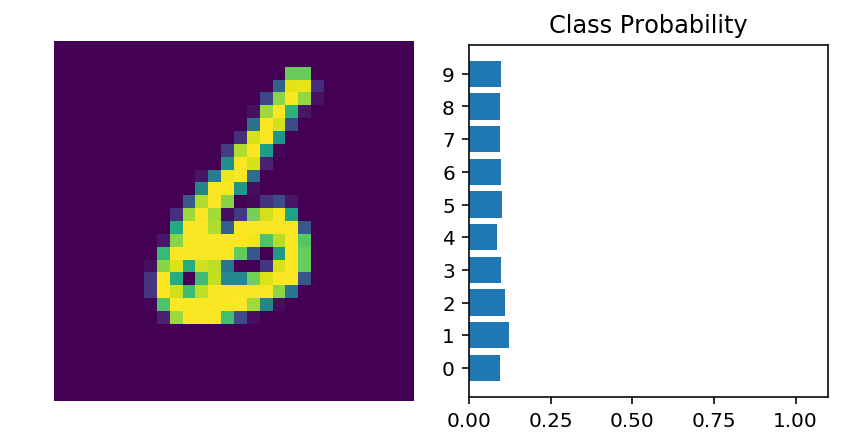

In [25]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)